# An Overview of K-Nearest Neighbors


K-Nearest Neighbors (KNN) is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.





**Here's an visualization of the KNN algorithm**







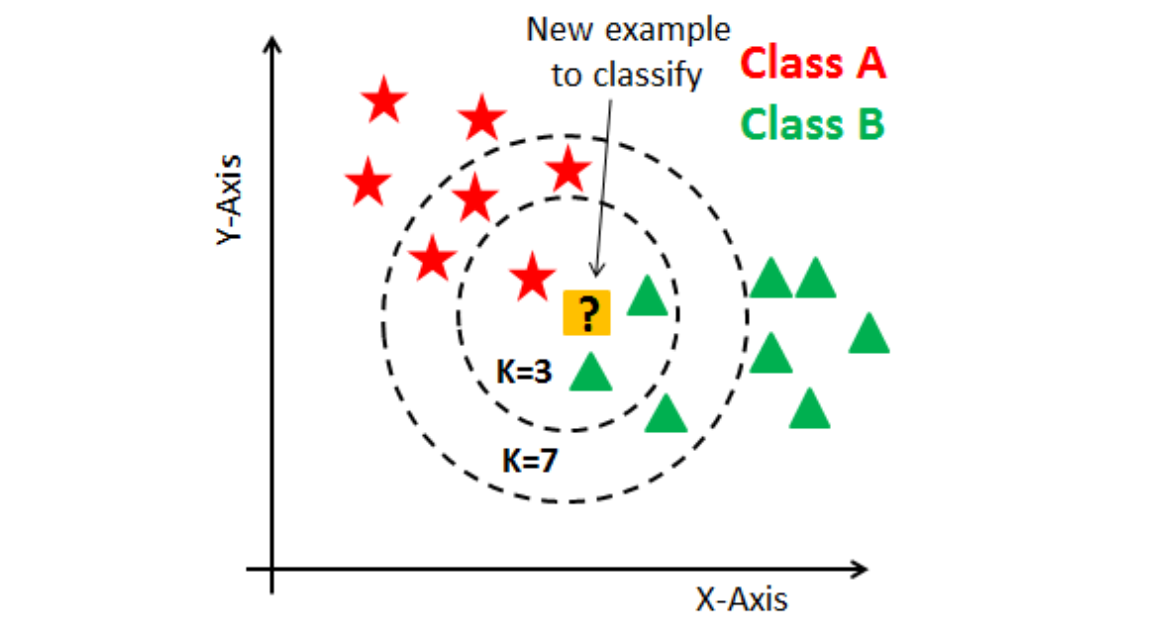


In supervised models, you have two types of variables at the same time:

* A target variable, which is also called the dependent variable or the y variable.
* Independent variables, which are also known as x variables or explanatory variables.

The target variable is the variable that you want to predict. It depends on the independent variables and it isn’t something that you know ahead of time. The independent variables are variables that you do know ahead of time.

**Pseudocode for KNN**

Input:
  - training_data: list of tuples (features, label)
  - test_instance: tuple of features
  - k: number of nearest neighbors to consider

Output:
  - predicted_label: the most common label among k nearest neighbors

Steps:

1. Initialize an empty list distances.

2. For each (features, label) in training_data:
    * a. Compute the distance between test_instance and features using a distance metric (e.g., Euclidean distance).
    * b. Append (distance, label) to distances.

3. Sort the list distances by distance (ascending order).

4. Select the first k elements from distances, which represent the k nearest neighbors.

5. Initialize an empty dictionary label_count.

6. For each (_, label) in the k nearest neighbors:
    * a. If label is not in label_count, set label_count[label] to 1.
    * b. Otherwise, increment label_count[label] by 1.

7. Find the label with the highest count in label_count.

8. Return the label with the highest count as predicted_label.


1. Hamming Distance
- What: Proportion of mismatched elements between two vectors

- When: Categorical data, text similarity, binary vectors, error detection

- Use case: DNA sequence comparison, spell checking, error-correcting codes

2. Euclidean Distance
- What: Straight-line distance between two points ("as the crow flies")

- When: Continuous numerical data, physical distances, most ML algorithms

- Use case: K-Nearest Neighbors, clustering, recommendation systems

3. Manhattan Distance
- What: Sum of absolute differences along coordinate axes ("city block distance")

- When: Grid-based movement, sparse data, when outliers should have less impact

- Use case: Urban navigation, image processing, taxicab geometry

4. Minkowski Distance
- What: Generalized distance metric (p=1 → Manhattan, p=2 → Euclidean)

- When: Need to control sensitivity to outliers, flexible distance measurement

- Use case: Customizable similarity measures, parameterized algorithms

In [22]:
# Hamming Distance
def hamming_distance(a, b):
	return sum(abs(e1 - e2) for e1, e2 in zip(a, b)) / len(a)

# define data
row1 = [0, 0, 0, 0, 0, 1]
row2 = [0, 0, 0, 0, 1, 0]
# calculate distance
dist = hamming_distance(row1, row2)
print(dist)

0.3333333333333333


In [23]:
# Same Hamming Distance but from scipy
from scipy.spatial.distance import hamming
# define data
row1 = [0, 0, 0, 0, 0, 1]
row2 = [0, 0, 0, 0, 1, 0]
# calculate distance
dist = hamming(row1, row2)
print(dist)

0.3333333333333333


In [24]:
# Euclidean distance
from math import sqrt

def euclidean_distance(a, b):
	return sqrt(sum((e1 - e2)**2 for e1, e2 in zip(a, b)))

# define data
row1 = [10, 20, 15, 10, 5]
row2 = [12, 24, 18, 8, 7]
# calculate distance
dist = euclidean_distance(row1, row2)
print(dist)

6.082762530298219


In [25]:
# Manhattan distance
from math import sqrt

def manhattan_distance(a, b):
	return sum(abs(e1-e2) for e1, e2 in zip(a,b))

# define data
row1 = [10, 20, 15, 10, 5]
row2 = [12, 24, 18, 8, 7]
# calculate distance
dist = manhattan_distance(row1, row2)
print(dist)

13


In [26]:
# Same Manhattan distance but from scipy
from scipy.spatial.distance import cityblock
# define data
row1 = [10, 20, 15, 10, 5]
row2 = [12, 24, 18, 8, 7]
# calculate distance
dist = cityblock(row1, row2)
print(dist)

13


In [27]:
# Minkowski distance
from math import sqrt

# calculate minkowski distance
def minkowski_distance(a, b, p):
	return sum(abs(e1-e2)**p for e1, e2 in zip(a,b))**(1/p)

# define data
row1 = [10, 20, 15, 10, 5]
row2 = [12, 24, 18, 8, 7]
# calculate distance (p=1)
dist = minkowski_distance(row1, row2, 1)
print(dist)
# calculate distance (p=2)
dist = minkowski_distance(row1, row2, 2)
print(dist)

13.0
6.082762530298219


In [28]:
# Same Minkowski distance but from scipy
from scipy.spatial import minkowski_distance
# define data
row1 = [10, 20, 15, 10, 5]
row2 = [12, 24, 18, 8, 7]
# calculate distance (p=1)
dist = minkowski_distance(row1, row2, 1)
print(dist)
# calculate distance (p=2)
dist = minkowski_distance(row1, row2, 2)
print(dist)

13.0
6.082762530298219


In [29]:
#Chebyshev distance
import numpy as np
def chebyshev_distance(pt1,pt2):
    return np.max(np.abs(np.subtract(pt1,pt2)))
pt1 = [2,3]
pt2 = [5,7]
dist = chebyshev_distance(pt1,pt2)
print(dist)

4


In [30]:
#using the scipy library
from scipy.spatial.distance import chebyshev
# Calculate Chebyshev distance
def chebyshev_dist_sci(pt1, pt2):
    return chebyshev(pt1, pt2)
pt1 = [2,3]
pt2 = [5,7]
dist = chebyshev_dist_sci(pt1,pt2)
print(dist)

4


In [31]:
# NumPy versions
def hamming_distance_numpy(a, b):
    return np.mean(a != b)  # Proportion of mismatched elements

def euclidean_distance_numpy(a, b):
    return np.linalg.norm(a - b)  # Square root of sum of squared differences

def manhattan_distance_numpy(a, b):
    return np.sum(np.abs(a - b))  # Sum of absolute differences

def minkowski_distance_numpy(a, b, p):
    return np.sum(np.abs(a - b)**p)**(1/p)  # Generalized distance metric



In [32]:
print(f'given two points (2,3) and (5,7), hamming dist: {hamming_distance_numpy([2,3],[5,7])}')
print(f'given two points (2,3) and (5,7), euclidean dist: {euclidean_distance_numpy(np.array([2,3]),np.array([5,7]))}')
print(f'given two points (2,3) and (5,7), manhattan dist: {manhattan_distance_numpy(np.array([2,3]),np.array([5,7]))}')
print(f'given two points (2,3) and (5,7), minkowski dist: {minkowski_distance_numpy(np.array([2,3]),np.array([5,7]),3)}')
print(f'given two points (2,3) and (5,7), chebyshev dist: {chebyshev_dist_sci([2,3],[5,7])}')

given two points (2,3) and (5,7), hamming dist: 1.0
given two points (2,3) and (5,7), euclidean dist: 5.0
given two points (2,3) and (5,7), manhattan dist: 7
given two points (2,3) and (5,7), minkowski dist: 4.497941445275415
given two points (2,3) and (5,7), chebyshev dist: 4


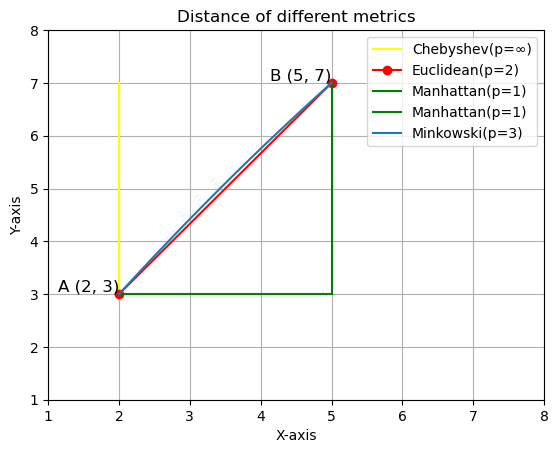

In [14]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


# Plot the line
plt.plot([2,2], [3,7], color ='yellow', label= 'Chebyshev(p=\u221E)')  # 'o' adds markers at the points
plt.plot([2,5], [3,7], marker='o', color='red', label='Euclidean(p=2)')
plt.plot([2,5],[3,3], color='green', label = 'Manhattan(p=1)')
plt.plot([5,5],[3,7], color='green',label = 'Manhattan(p=1)')

# Define the points
x = [2, 3.5, 5]  # x-coordinates (including a midpoint for curvature)
y = [3, 5.1, 7]    # y-coordinates (including a midpoint for curvature)

# Generate a smooth curve
x_smooth = np.linspace(min(x), max(x), 100)
spl = make_interp_spline(x, y, k=2)  # Quadratic spline
y_smooth = spl(x_smooth)

# Plot the curve
plt.plot(x_smooth, y_smooth,label = "Minkowski(p=3)")
plt.text(2, 3, 'A (2, 3)', fontsize=12, ha='right', va='bottom')
plt.text(5, 7, 'B (5, 7)', fontsize=12, ha='right', va='bottom')
#plt.scatter(x, y, color="red", label="")
plt.legend()


plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(1, 8) 
plt.ylim(1, 8)
plt.title('Distance of different metrics')
plt.grid(True)

# Show the plot
plt.show()


In [33]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.utils import shuffle

In [35]:
class KNearestNeighbors:
    def __init__(self, k: int = 3, metric: int = 'euclidean'):
        if k <= 0:
          raise ValueError('bad k value')
        self.k = k
        self.training_data = None
        self.metric = metric

    def fit(self, X_train, y_train):
        """
        Stores the training data.

        Parameters:
        - X_train: numpy array of shape (n_samples, n_features), feature data
        - y_train: numpy array of shape (n_samples,), labels for training data
        """
        self.training_data = (X_train,y_train)

    def predict(self, X_test):
        """
        Predicts labels for test data.

        Parameters:
        - X_test: numpy array of shape (n_samples, n_features), feature data for prediction

        Returns:
        - predictions: numpy array of predicted labels
        """
        predictions = [self._predict_single(x) for x in X_test]
        return np.array(predictions)

    def _predict_single(self, x):
        """
        Predicts the label for a single test instance.

        Parameters:
        - x: numpy array of shape (n_features,), a single feature vector

        Returns:
        - predicted_label: the label predicted for the instance
        """
        X_train, y_train = self.training_data

        distances = [self._compute_distance(x, x_train) for x_train in X_train]

        k_indices = np.argsort(distances)[:self.k]

        most_common_k_nearest_label = Counter([y_train[i] for i in k_indices]).most_common(1)

        return most_common_k_nearest_label[0][0]

    def _compute_distance(self, x1, x2):
        """
        Computes the distance between two points using specified metric.

        Parameters:
        - x1, x2: numpy arrays of shape (n_features,), two feature vectors
        - metric: distance metric to use

        Returns:
        - distance: the calculated distance between x1 and x2
        """
        if self.metric == 'euclidean':
            return euclidean_distance_numpy(x1, x2)
        elif self.metric == 'manhattan':
            return manhattan_distance_numpy(x1, x2)
        elif self.metric == 'minkowski':
            return minkowski_distance_numpy(x1, x2, p)
        elif self.metric == 'hamming':
            return hamming_distance_numpy(x1, x2)
        else:
            raise ValueError(f"Unsupported metric: {self.metric}")


Let's look at an synthetic simple example to verify that everything is implemented correctly. Based on the labels passed to the input, the output should be 0 1

In [36]:
X_train = np.array([[1,2],[2,3],[3,4],[6,7],[6,8],[7,8],[8,8]])
y_train = np.array([0,0,0,1,1,1,1])
X_test = np.array([[2,1],[7,7]])

knn = KNearestNeighbors(k=3, metric='manhattan')
knn.fit(X_train, y_train)

knn.predict(X_test)

array([0, 1])

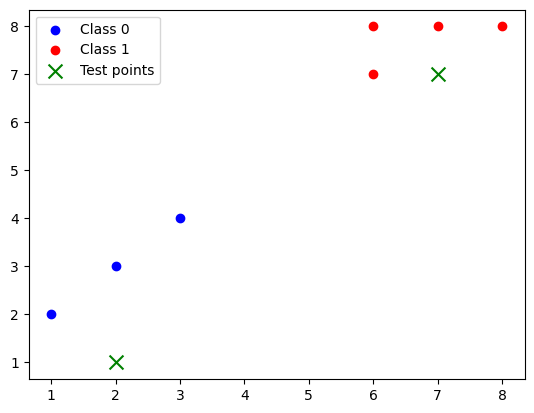

In [18]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='blue', label='Class 0')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='red', label='Class 1')
plt.scatter(X_test[:, 0], X_test[:, 1], c='green', marker='x', s=100, label='Test points')
plt.legend()
plt.show()

# Practical application of K-Nearest Neighbors


For initial work, we need to learn how to read a dataset. We will be working with two datasets in total.


*  Cancer.csv – This is a dataset containing information about patients with benign and malignant tumors. The task is to learn how to distinguish between them.
*  Spam.csv – A larger dataset that contains some statistics about messages and labels indicating whether the message is spam. The task is to automatically differentiate spam messages from regular ones.

Implement the methods read_cancer_dataset and read_spam_dataset.
Each method takes the path to a dataset as input and returns the sample X and the corresponding labels y. The dataset should be shuffled randomly.

In [37]:
def read_cancer_dataset(path_to_csv: str):
    """
    Parameters
    ----------
    path_to_csv : str
        Path to the cancer dataset.

    Returns
    -------
    X : np.array
        Feature matrix of tumors.
    y : np.array
        Binary label vector, where 1 corresponds to a benign tumor (M),
        and 0 to a malignant one (B).
    """
    df = pd.read_csv(path_to_csv, sep=',')

    X = df.drop(columns=['label']).values

    y = np.where(df['label'] == 'M', 1, 0)

    X, y = shuffle(X, y, random_state=42)

    return X, y

def read_spam_dataset(path_to_csv: str):
    """
    Parameters
    ----------
    path_to_csv : str
        Path to the spam dataset.

    Returns
    -------
    X : np.array
        Feature matrix of messages.
    y : np.array
        Binary label vector, where 1 indicates that the message is spam,
        and 0 indicates that it is not spam.
    """
    df = pd.read_csv(path_to_csv, sep=',')

    X = df.drop(columns=['label']).values

    y = df['label'].values

    X, y = shuffle(X, y, random_state=42)

    return X, y

In [20]:
df1 = pd.read_csv("cancer.xls", sep=',')
#df1.columns = df1.iloc[0]
df1.head()

,label,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
df1.describe()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [38]:
X_cancer, y_cancer = read_cancer_dataset("cancer.xls")

In [39]:
X_spam, y_spam = read_spam_dataset("spam.xls")

When starting to work with data, we need to preprocess and prepare them. In particular, we need to divide the sample into two: a training sample and a test sample. The training sample is needed to train the algorithm, and the test sample is needed to verify the results of training. Usually we use a partition coefficient of 0.9.
It is necessary to return a tuple of X_train, y_train, X_test and y_test

In [40]:
from sklearn.model_selection import train_test_split
from typing import Tuple

def train_test_split_(X: np.array, y: np.array, ratio: float) -> Tuple[np.array, np.array, np.array, np.array]:
    """
    Split data using scikit-learn's train_test_split.

    Parameters
    ----------
    X : np.array
        Feature matrix.
    y : np.array
        Label vector.
    ratio : float
        Split ratio for training set.

    Returns
    -------
    X_train, y_train, X_test, y_test : np.array
        Training and test data.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio, random_state=42, shuffle=True)

    return X_train, y_train, X_test, y_test

In [41]:
X_train_spam, y_train_spam, X_test_spam, y_test_spam = train_test_split_(X_spam, y_spam, 0.9)

In [42]:
X_train_cancer, y_train_cancer, X_test_cancer, y_test_cancer = train_test_split_(X_cancer, y_cancer, 0.9)

Also, before we start solving the problem, we need to decide on the metrics that will allow us to evaluate the obtained solution. For classification tasks we can use precision, recall and accuracy. These metrics are counted for each class.
The method returns:
*  A Precision vector, each of whose elements is equal to the value of the precision metric for the corresponding class.
*  A Recall vector, each of whose elements is equal to the value of the recall metric for the corresponding class.
*  Accuracy - a number equal to the ratio of correctly classified elements in the sample to the sample size.

In [43]:
from typing import Tuple
from sklearn.metrics import precision_score, recall_score, accuracy_score

def get_precision_recall_accuracy(y_pred, y_true):
    """
    Calculate precision, recall, and accuracy for the given predictions and true labels.

    Parameters
    ----------
    y_pred : np.array
        Predicted labels from the model.
    y_true : np.array
        True labels.

    Returns
    -------
    precision : np.array
        Precision scores for each class.
    recall : np.array
        Recall scores for each class.
    accuracy : float
        Overall accuracy score.
    """
    precision = precision_score(y_true, y_pred, average=None)  # average None to get precision for each class, not the averaged
    recall = recall_score(y_true, y_pred, average=None)  # average None to get recall for each class, not the averaged
    accuracy = accuracy_score(y_true, y_pred)

    return precision, recall, accuracy

Let's run our version and the sklearn version on the spam dataset and compare the metrics.

In [45]:
knn = KNearestNeighbors(k = 6)
knn.fit(X_train_spam, y_train_spam)
y_pred_spam = knn.predict(X_test_spam)

get_precision_recall_accuracy(y_pred_spam,y_test_spam)

(array([0.83571429, 0.79558011]),
 array([0.86346863, 0.75789474]),
 0.8199566160520607)

In [83]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train_spam, y_train_spam)

y_pred_spam = knn.predict(X_test_spam)

get_precision_recall_accuracy(y_pred_spam,y_test_spam)

C:\Users\belka\anaconda3\envs\tf-gpu\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\belka\anaconda3\envs\tf-gpu\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


(array([0.85294118, 0.79365079]),
 array([0.85608856, 0.78947368]),
 0.8286334056399133)

Same on the cancer dataset and compare the metrics.

In [84]:
knn = KNearestNeighbors(k = 3)
knn.fit(X_train_cancer, y_train_cancer)
y_pred_cancer = knn.predict(X_test_cancer)

get_precision_recall_accuracy(y_pred_cancer,y_test_cancer)

(array([0.88571429, 0.90909091]),
 array([0.93939394, 0.83333333]),
 0.8947368421052632)

In [85]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train_cancer, y_train_cancer)

y_pred_cancer = knn.predict(X_test_cancer)

get_precision_recall_accuracy(y_pred_cancer, y_test_cancer)

(array([0.88571429, 0.90909091]),
 array([0.93939394, 0.83333333]),
 0.8947368421052632)

# Hyperparameter Tuning

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
import matplotlib.pyplot as plt

In [47]:
param_grid = {'n_neighbors': range(2, 10)}  # search n_neighbors parameter in KNeighborsClassifier

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring=make_scorer(accuracy_score))
grid_search.fit(X_train_spam, y_train_spam)

best_k = grid_search.best_params_['n_neighbors']
best_k

C:\Users\belka\anaconda3\envs\tf-gpu\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\belka\anaconda3\envs\tf-gpu\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


3

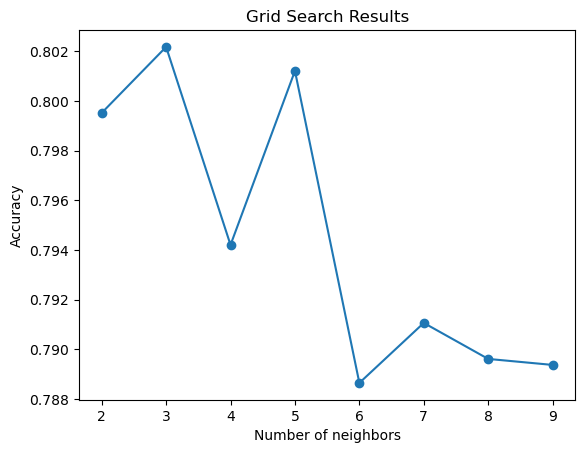

In [88]:
results = grid_search.cv_results_

plt.plot (param_grid['n_neighbors'],results['mean_test_score'],marker = 'o')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('Grid Search Results')
plt.show()

In [89]:
knn = KNeighborsClassifier (n_neighbors=3, metric='euclidean')
knn.fit(X_train_cancer, y_train_cancer)
y_pred_cancer = knn.predict(X_test_cancer)
get_precision_recall_accuracy(y_pred_cancer,y_test_cancer)

(array([0.88571429, 0.90909091]),
 array([0.93939394, 0.83333333]),
 0.8947368421052632)

In [90]:
param_grid = {'n_neighbors': range(2, 10)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring=make_scorer(accuracy_score))
grid_search.fit(X_train_cancer, y_train_cancer)
best_k = grid_search.best_params_['n_neighbors']
best_k

5

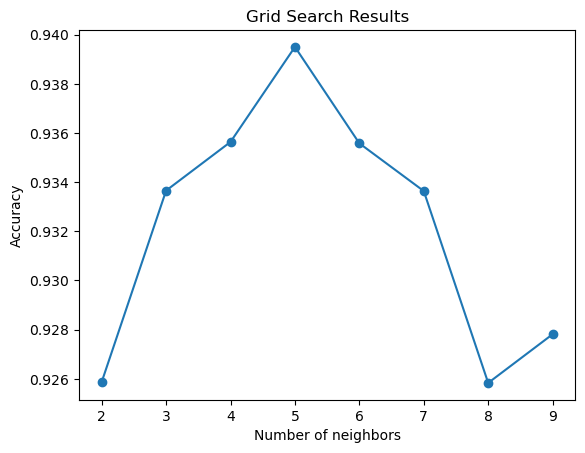

In [91]:
results = grid_search.cv_results_
plt.plot (param_grid['n_neighbors'],results['mean_test_score'],marker = 'o')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('Grid Search Results')
plt.show()

Advantages and disadvantages

First, let's talk about the advantages of the algorithm.

- It is nonparametric, that is, it does not make explicit assumptions about the distribution of data.
- Very easy to explain and interpret.
- It is quite accurate, although it is often inferior to gradient boosting and random forest in accuracy.
- It can be used for both classification and regression.

Despite the great advantages, the algorithm is not without its disadvantages.

- Inefficient in terms of memory, since you need to store the entire training sample.
- Computationally expensive for the same reason.
- It is sensitive to the scale of the data, as well as to uninformative features.
- To apply the algorithm, it is necessary that the metric proximity of objects coincide with their semantic proximity, which is not always easy to achieve.

Application

Due to its shortcomings, the algorithm is very inefficient in tasks with a large amount of data. However, it still has many uses in the real world. Here are just a few of them:

- Recommendation systems. If you look at the very formulation of the task "to offer the user something similar to what he likes", then KNN is directly suggested as a solution. Despite the fact that more advanced algorithms are often used now, the nearest neighbor method is still used as a good baseline.
- Search for semantically similar documents. If the vector representations are close to each other, then the document topics are similar.
- Search for anomalies and outliers. Due to the fact that the algorithm remembers the training sample completely, it is easy for it to see how similar the target object is to all the data it has seen.
- The task of credit scoring. The ratings of two people who have roughly the same salary, similar positions, and credit histories shouldn't differ much, so KNN is great for this task.
- The issue of algorithm complexity is not obvious and requires a detailed analysis, which will be partially carried out in the next section.